# Trabajo Práctico 1: Regresión Lineal
## Taller de Procesamiento de Señales
## Alumno: Julián Stejman
 ---

a) En el mercado de smartphones, los dispositivos con mayor capacidad de almacenamiento suelen
tener baterías más duraderas. Modelar estos datos podría ayudar a estimar la duración de la batería
en función de su capacidad de almacenamiento, algo útil para los consumidores a la hora de elegir
un nuevo dispositivo. Sea $X$ la capacidad de almacenamiento de los smartphones (en TB) e $Y$ la
duración de su batería (en días), con densidad de probabilidad conjunta de la forma:

$$f_{X Y}(x,y) = \frac{3}{4}  𝟙\{0 < y < 1 + x^2, x \in (0,1)\}$$

1. Calcular esperanza condicional
2. Calcular error bayesiano
3. Calcular recta de regresión
---

### 1. Calcular esperanza condicional:
$f_{XY}(x,y)$ se puede reescribir como 
$$
f_{XY}(x,y) = \frac{1}{1+x^2}𝟙\{0<y<1+x^2\} \cdot \frac{3}{4}(1+x^2)𝟙\{x \in (0,1)\}
$$
donde el primer término corresponde a la distribución condicional de Y: $f_{Y|X=x}$ y la segunda es la distribución marginal de x: $f_x$. Entonces se puede decir que $Y|X=x \sim U(0,1+x^2)$. 
$$
\mathbb{E}[Y|X=x] = \frac{1+x^2}{2} 
$$


### 2. Calcular error bayesiano
El error bayesiano se define como $\mathbb{E}[var(Y|X)]$.
Como la varianza de una variable uniforme $u \sim U(a,b)$ es $= \frac{(b-a)^2}{12}$
$$
var(Y|X)  =\frac{(1+x^2)^2}{12}
$$
$$
\implies \mathbb{E}[var(Y|X)] = \int_0^1 var(Y|X)f_X(x)dx = \int_0^1 \frac{(1+x^2)^3}{16}dx = \frac{6}{35}
$$

### 3. Calcular recta de regresión:
La aproximación de Y a través de la recta de regresión de X es $\hat{Y}= aX+b$ para algunos específicos $ a,b \in \mathbb{R}$ y se cumple que $\mathbb{E}[(Y-\hat{Y})^2]$ es mínima cuando $a = \frac{cov(X,Y)}{var(X)}$ y $b= \mathbb{E}[Y] - a\mathbb{E}[X]$. 

Para calcular los valores de a y b se requieren $\mathbb{E}[X], \mathbb{E}[X^2], \mathbb{E}[X^3], \mathbb{E}[Y], \mathbb{E}[XY], cov(X,Y)$ y $var(X)$. 

- $\mathbb{E}[X] = \int_0^1 x \cdot f_x(x) dx = \int_0^1 x \cdot \frac{3}{4}(1+x^2)dx = \frac{9}{16}$
  
- $\mathbb{E}[X^2] = \int_0^1 x^2 \cdot f_x(x) dx = \int_0^1 x^2 \cdot \frac{3}{4}(1+x^2)dx = \frac{2}{5}$
  
- $\mathbb{E}[X^3] = \int_0^1 x^3 \cdot f_x(x) dx = \int_0^1 x^3 \cdot \frac{3}{4}(1+x^2)dx = \frac{5}{16}$

- $\mathbb{E}[Y] = \mathbb{E}[\mathbb{E}[Y|X]] = \mathbb{E}[\frac{1+X^2}{2}] = \frac{1}{2}(1+ \mathbb{E}[X^2]) = \frac{1}{2}(1+\frac{2}{5}) = \frac{7}{10}$

- $\mathbb{E}[XY] = \mathbb{E}[X \cdot \mathbb{E}[Y|X]] = \mathbb{E}[X \cdot \frac{1+X^2}{2}] = \frac{1}{2}(\mathbb{E}[X] + \mathbb{E}[X^3]) = \frac{1}{2}(\frac{9}{16} + \frac{5}{16}) = \frac{7}{16}$

- $cov(X,Y) = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y] = \frac{7}{16}- \frac{9}{16} \cdot \frac{7}{10} = \frac{7}{160}$

- $var(X) = \mathbb{E}[X^2] - \mathbb{E}[X]^2 = \frac{2}{5} - (\frac{9}{16})^2 = \frac{107}{1280}$

$$
a = \frac{cov(X,Y)}{var(X)} = \frac{\frac{7}{160}}{\frac{107}{1280}} = \frac{56}{107}
$$

$$
b = \mathbb{E}[Y] - a\mathbb{E}[X] = \frac{7}{10} - \frac{56}{107} \cdot \frac{9}{16} = \frac{217}{535}
$$

$$
\hat{Y} = \frac{56}{107}X + \frac{217}{535}
$$

b) Utilizando ```random.uniform```, generar un dataset de 500 pares de muestras.

---

Para esto se propone un espacio generar muestras uniformes a lo largo del rectángulo que inicia en el origen y termina en la coordenada $(x,y) = (1,2)$ y luego limitar las muestras que estuvieran por arriba de la curva $y = 1+x^2$

In [4]:
import numpy as np
n_samples = 500
dataset = []
while len(dataset) < n_samples:
    x = np.random.uniform(0,1)
    y = np.random.uniform(0,2)
    if y<=1+ x**2:
        dataset.append((x, y))
dataset = np.array(dataset)


c) *Regresión Lineal:*
1. Implementar una regresión lineal (matricial) a partir de los datos generados previamente.

---

La idea sería generar, a través del método ```fit```, las siguientes matrices en base a los datos provistos. 
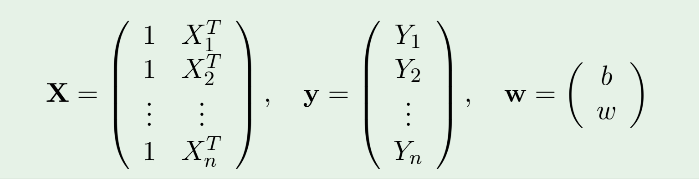

Luego se busca hallar el vector $w = (X^TX)^{-1}X^Ty$ del cual quedará descripta la recta de regresión.

En el método ```predict``` se utilizará la misma recta para hallar algún valor particular de la recta.

In [5]:
class reglin_matricial:
    def __init__(self):
        self.w_ = 0
        self.b_ = 0
    def fit(self, train_data):
        # saco la dimensión de los datos
        n = train_data.shape[0]
        # concateno un vector de unos a la matriz de datos
        X = np.c_[np.ones(n), train_data[:,0]]
        # la siguiente columna corresponde a los valores de y
        y = train_data[:,1]
        # calculo el vector de pesos
        w_vector = np.linalg.inv(X.T @ X) @ X.T @ y
        self.b_ = w_vector[0]
        self.w_ = w_vector[1]
    def predict(self, x):
        return self.w_ * x + self.b_
    

2. Entrenar la regresión lineal con el dataset generado anteriormente.
3. Utilizar el regresor para predecir la duración de una batería de 256GB.

---

Se entrena el regresor con el dataset generado y se predice la duración de batería en $x=0.25$ lo cual sería 256GB en TB. De ahí se obtienen los valores del peso $w$ y la constante independiente $b$ tanto como la predicción en días de duración de batería del celular.

In [26]:
reglin = reglin_matricial()
reglin.fit(dataset)
# predicción para x = 0.25 (256GB)
y_256GB = reglin.predict(0.25)
print("Parámetros de regresión lineal matricial:")
print(f'w = {reglin.w_.round(3)}', f'b = {reglin.b_.round(3)}')
print(f'reglin(0.25 TB) = {y_256GB.round(3)} días')

Parámetros de regresión lineal matricial:
w = 0.54 b = 0.419
reglin(0.25 TB) = 0.554 días


d) *Comparación:* Graficar en una misma figura el soporte, la esperanza condicional, la recta de regresión (teórica) y la regresión lineal hallada.

---
Se puede observar en el gráfico como queda delimitado el soporte en el espacio $[0,0] \times [1,2]$, y dentro del soporte, la esperanza condicional, regresión lineal teórica y la hallada a través del regresor matricial. Éstas últimas 3 parecieran acercarse dentro del rango de $x \in (0.3, 0.9)$ lo cuál hace que cualquiera de estas pueda ser un predictor válido en este rango.


In [10]:
import matplotlib.pyplot as plt
x_range = np.linspace(0,1,100)
y_range = np.linspace(0,2,100)
X, Y = np.meshgrid(x_range, y_range)
soporte = (Y>0) & (Y<=1+X**2)
esperanza_condicional = (1+x_range**2)/2
reglin_teorica = (56*x_range)/107 + (217/535)
reglin_hallada = reglin.predict(x_range)

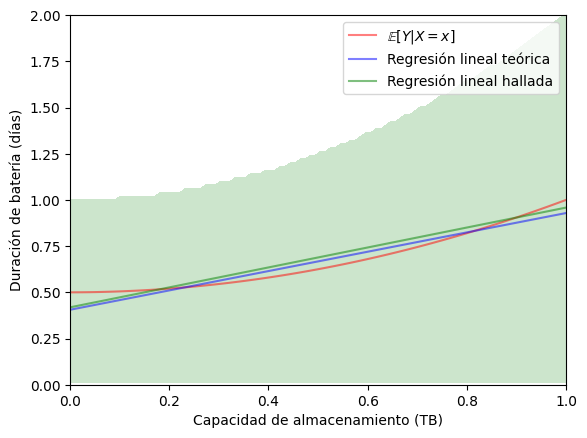

In [16]:
ax, fig = plt.subplots()
fig.contourf(X, Y, soporte, alpha=0.2, colors=['white', 'green'])
fig.plot(x_range, esperanza_condicional, color='red', alpha = 0.5, label = "$\mathbb{E}[Y|X=x]$")
fig.plot(x_range, reglin_teorica, color='blue', alpha = 0.5, label = 'Regresión lineal teórica')
fig.plot(x_range, reglin_hallada, color='green', alpha = 0.5, label = 'Regresión lineal hallada')
fig.set_xlabel("Capacidad de almacenamiento (TB)")
fig.set_ylabel('Duración de batería (días)')
fig.legend()
plt.show()

e) Repetir el inciso **(c)** utilizando gradiente descendiente.

---
En esta clase, se utilizará el algoritmo iterativo gradiente descendiente para poder hallar un resultado similar al previo pero que tendrá menor costo computacional ya que no tendrá que hallar inversas de matrices. En síntesis, es prácticamente lo mismo que se declaró en el inciso (c) con la diferencia de que el vector $w$ se halla utilizando la siguiente ecuación:

$$
J(w) = \frac{1}{n}||Xw-y||^2
$$
$$
w_t = w_{t+1} - \alpha\nabla J(w_t) 
$$
$$
\nabla J(w_t) = \frac{2}{n}X^T(Xw-y) 
$$

Como $\alpha$ es un número chico se puede sacar el 2 del gradiente y quedará la siguiente ecuación recursiva:

$$
w_t = w_{t+1} - \frac{\alpha}{n}X^T(Xw-y) 
$$

Luego de ```max_iter``` iteraciones se puede esperar que si el alpha elegido es suficientemente chico, haya llegado a converger a un resultado similar al regresor lineal matricial.

In [ ]:
class reglin_gd:
    def __init__(self, lr = 0.1, max_iter = 1000):
        self.lr = lr
        self.n_iter = max_iter
        self.w_ = 0
        self.b_ = 0
    def fit(self, train_data):
        n = train_data.shape[0]
        X = np.c_[np.ones(n), train_data[:,0]]
        y = train_data[:,1]
        w_vector = np.zeros(2)
        for _ in range(self.n_iter):
            # w_{t+1} = w_t -  lr * gradiente(MSE(w_t))
            w_vector = w_vector - self.lr * (X.T @ (X @ w_vector - y))/n
        self.b_ = w_vector[0]
        self.w_ = w_vector[1]
    def predict(self, x):
        return self.w_ * x + self.b_

Aquí se pueden ver las diferencias en los resultados hallados con ambos algoritmos.

In [24]:
reglin2 = reglin_gd()
reglin2.fit(dataset)
y_256GB_gd = reglin2.predict(0.25)
print("Parámetros de regresión lineal por gradiente descendiente:")
print(f'w_gd = {reglin2.w_.round(3)}', f'b_gd = {reglin2.b_.round(3)}')
print(f'reglin_gd(0.25 TB) = {y_256GB_gd.round(3)} días')

print("\nParámetros de regresión lineal matricial:")
print(f'w = {reglin.w_.round(3)}', f'b = {reglin.b_.round(3)}')
print(f'reglin(0.25 TB) = {y_256GB.round(3)} días')

Parámetros de regresión lineal por gradiente descendiente:
w_gd = 0.539 b_gd = 0.419
reglin_gd(0.25 TB) = 0.554 días

Parámetros de regresión lineal matricial:
w = 0.54 b = 0.419
reglin(0.25 TB) = 0.554 días
